- https://proglib.io/p/unsupervised-ml-with-python/
- https://stackoverflow.com/questions/36195457/python-sklearn-kmeans-how-to-get-the-values-in-the-cluster
- https://habr.com/ru/post/202090/
- https://habr.com/ru/company/ods/blog/325654/
- https://stackoverflow.com/questions/32764722/matplotlib-how-to-use-marker-size-color-as-an-extra-dimension-in-plots
- https://stackoverflow.com/questions/49199987/how-to-make-a-4d-plot-using-matplotlib
- https://stackoverflow.com/questions/7855229/how-to-make-a-4d-plot-using-python-with-matplotlib
- https://stackoverflow.com/questions/14995610/how-to-make-a-4d-plot-with-matplotlib-using-arbitrary-data
- http://matplotlib.1069221.n5.nabble.com/4D-Scatter-Plot-td5149.html
- https://stackoverflow.com/questions/50467393/plot-4d-plot-in-python
- [The Art of Effective Visualization of Multi-dimensional Data](https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57)
- https://www.kaggle.com/hekkon/testing
- [Effective Visualization of Multi-Dimensional Data — A Hands-on Approach](https://medium.com/swlh/effective-visualization-of-multi-dimensional-data-a-hands-on-approach-b48f36a56ee8)
- https://stackoverflow.com/questions/44006595/visualization-of-4d-vectors-in-python

In [1]:
from sklearn import datasets

d = datasets.load_iris()

In [18]:
print(', '.join(d.feature_names))
print(''.join(str(_) for _ in d.target))
print(', '.join(d.target_names))

sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
000000000000000000000000000000000000000000000000001111111111111111111111111111111111111111111111111122222222222222222222222222222222222222222222222222
setosa, versicolor, virginica


In [2]:
import pandas as pd

df = pd.DataFrame([])
df['sepal length'] = d.data[:, 0]
df['sepal width']  = d.data[:, 1]
df['petal length'] = d.data[:, 2]
df['petal width']  = d.data[:, 3]
df['label']  = d.target
df['label name']  = d.target_names[d.target]

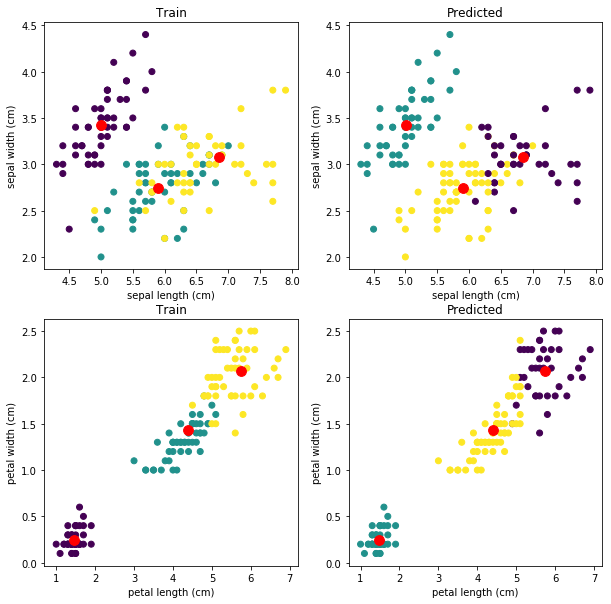

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Warn: actually data is 4d, not in 2d

model = KMeans(n_clusters=3)  # len(d.target_names)
model.fit(df[['sepal length','sepal width','petal length','petal width']])
model.predict([[5.1, 3.5, 1.4, 0.2]])
df['pred'] = model.predict(df[['sepal length','sepal width','petal length','petal width']])

fig = plt.figure(figsize=(10,10))

ax0 = fig.add_subplot(221, xlabel=d.feature_names[0], ylabel=d.feature_names[1])
ax1 = fig.add_subplot(222, xlabel=d.feature_names[0], ylabel=d.feature_names[1])
ax2 = fig.add_subplot(223, xlabel=d.feature_names[2], ylabel=d.feature_names[3])
ax3 = fig.add_subplot(224, xlabel=d.feature_names[2], ylabel=d.feature_names[3])

ax0.set_title('Train')
ax1.set_title('Predicted')
ax2.set_title('Train')
ax3.set_title('Predicted')

ax0.scatter(df['sepal length'], df['sepal width'], c=df['label'])
ax1.scatter(df['sepal length'], df['sepal width'], c=df['pred'])
ax2.scatter(df['petal length'], df['petal width'], c=df['label'])
ax3.scatter(df['petal length'], df['petal width'], c=df['pred'])

ax0.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r', s=96)
ax1.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r', s=96)
ax2.scatter(model.cluster_centers_[:,2], model.cluster_centers_[:,3], c='r', s=96)
ax3.scatter(model.cluster_centers_[:,2], model.cluster_centers_[:,3], c='r', s=96)

plt.show()

In [71]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


data = np.array([*'abc'])
label.fit(data)
label.classes_
label.transform([*'cba'])
label.inverse_transform([0])

array(['a'], dtype='<U1')

In [51]:
from sklearn.cluster import KMeans
import numpy as np

data = np.array([ [1,  130], [1, -150],
                  [2,   98], [7,   30],
                  [3,   54], [5,  -70],
                  [4,  -15], [4,   38],
                  [4,  -40], [2,  -15],
                  [3,   40], [3,   80],
                  [7, -130], [1,  150],
                  [5,   96], [7,  -80],
                  [1,  -96], [2,   84],
                  [2,  110], [1,  -48] ])
model = KMeans(n_clusters=2)
model.fit(data)
model.labels_

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1],
      dtype=int32)

In [52]:
model.cluster_centers_

array([[  3.        ,  82.72727273],
       [  3.55555556, -71.55555556]])

In [54]:
model.predict([[3, 120], [3, -50], [7, 50], [1, 1]])

array([0, 1, 0, 1], dtype=int32)

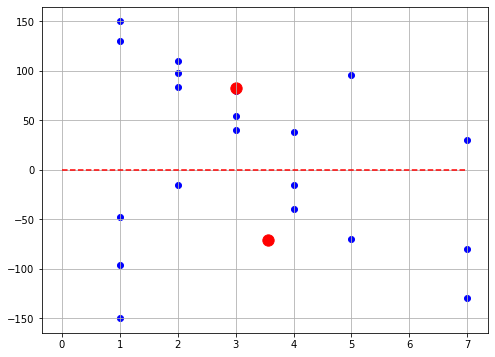

In [59]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c='b')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r', s=128)
plt.plot([0,data[:, 0].max()], [0,0], 'r--')
plt.grid(True)
plt.show()